In [1]:
# Sample API
import flowx
import simulation
import numpy
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40, 40

xmin, xmax = 0.0, 2.0*numpy.pi
ymin, ymax = 0.0, 2.0*numpy.pi

# Define cell-centered variable names
center_vars   = ['pres', 'delp', 'divv', 'asol', 'eror']
face_vars     = ['velc', 'hvar', 'asol', 'eror']

ins_vars      = ['velc', 'hvar', 'divv', 'pres', 'delp']
poisson_vars  = ['delp', 'divv']

scalar_info     = dict(tmax =  2, dt = 0.001, Re = 1.0)
simulation_info = dict(time_stepping = 'euler', 
                       poisson_solver = 'serial_direct', 
                       maxiter = 3000, 
                       pressure_correct = True)

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_center = dict(delp = ['neumann', 'neumann', 'neumann', 'neumann'])
bc_val_center  = dict(delp = [0.0, 0.0, 0.0, 0.0])

bc_type_facex = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facex  = dict(velc = [0.0, 0.0, 0.0, 0.0])

bc_type_facey = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facey  = dict(velc = [0.0, 0.0, 0.0, 0.0])

gridc, gridx, gridy, scalars, particles = flowx.serial.domain_main(nx, ny, xmin, xmax, ymin, ymax,
                                              center_vars, face_vars, scalar_info,
                                              bc_type_center=bc_type_center, bc_val_center=bc_val_center,
                                              bc_type_facex=bc_type_facex, bc_val_facex=bc_val_facex,
                                              bc_type_facey=bc_type_facey, bc_val_facey=bc_val_facey)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

poisson = flowx.poisson_main(gridc, poisson_vars, simulation_info)

imbound = flowx.imbound_main()

ins = flowx.ins_main(poisson, imbound, domain_data_struct, ins_vars, simulation_info)

In [3]:
simulation.update_bc_val(gridx, gridy, 'velc', scalars.to)
simulation.get_initial(gridc, gridx, gridy, 'velc', 'pres')

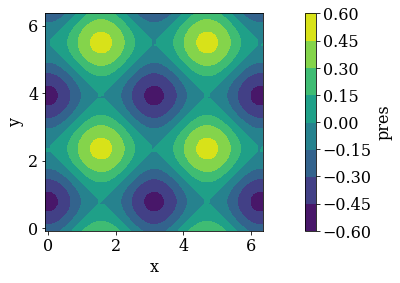

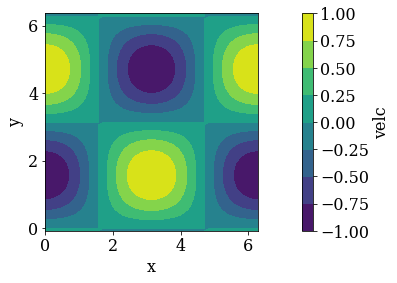

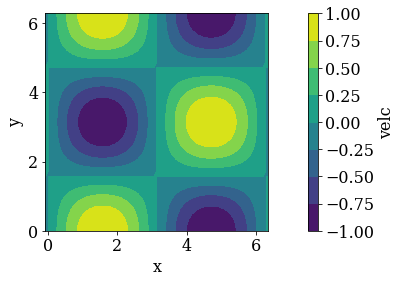

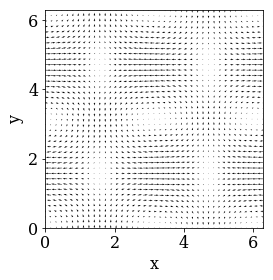

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridy, 'velc')
flowx.io.plot_vector(gridx, gridy, 'velc')

In [5]:
while scalars.time <= scalars.tmax:
    
    # Update the time-dependent boundary condition value
    simulation.update_bc_val(gridx, gridy, 'velc', scalars.time)
    
    ins.advance()
    
    # Display stats
    if scalars.nstep % 10 == 0:
        flowx.io.display_stats(scalars)   
    
    scalars.advance()

------------ Time = 0.0 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.482349468613336e-13
Total poisson time : 0.021339893341064453
Total INS time : 0.027281999588012695
Max, Min, U   : 0.9969173337331281, -0.996917333733128
Max, Min, V   : 0.996917333733128, -0.9969173337331281
Max, Min, P   : 1.3426277628372811, -1.775205122498882
Max, Min, DIV : 8.881784197001252e-16, -7.771561172376096e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.010000000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.446484229852347e-13
Total poisson time : 0.004567146301269531
Total INS time : 0.005561113357543945
Max, Min, U   : 0.9771770479217199, -0.9771770479217198
Max, Min, V   : 0.9771770479217198, -0.9771770479217199
Max, Min, P   : -3.447103046503009, -4.472134417162968
Max, Min, DIV : 7.771561172376096e-16, -7.216449660063518e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.02000000000000001 ---------------
Numbe

------------ Time = 0.20000000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.084140457553008e-13
Total poisson time : 0.004555940628051758
Total INS time : 0.0052568912506103516
Max, Min, U   : 0.668253673041717, -0.6682536730417169
Max, Min, V   : 0.6682536730417169, -0.668253673041717
Max, Min, P   : -0.7642613335948705, -1.2854558911565146
Max, Min, DIV : 6.661338147750939e-16, -6.800116025829084e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.21000000000000016 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.17121233455841e-13
Total poisson time : 0.0039370059967041016
Total INS time : 0.004806041717529297
Max, Min, U   : 0.6550213637478571, -0.6550213637478571
Max, Min, V   : 0.6550213637478571, -0.6550213637478571
Max, Min, P   : 0.23962425742612092, -0.26420862725560534
Max, Min, DIV : 6.38378239159465e-16, -6.938893903907228e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.22000000000000017 -

------------ Time = 0.3800000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 6.539352272353636e-13
Total poisson time : 0.005641937255859375
Total INS time : 0.006439924240112305
Max, Min, U   : 0.466224767491217, -0.46622476749121694
Max, Min, V   : 0.46622476749121694, -0.466224767491217
Max, Min, P   : -2.3807049343753977, -2.6745913102770573
Max, Min, DIV : 3.885780586188048e-16, -4.440892098500626e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.3900000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.9532821147097423e-13
Total poisson time : 0.005207061767578125
Total INS time : 0.006327152252197266
Max, Min, U   : 0.45699289855764136, -0.4569928985576413
Max, Min, V   : 0.4569928985576413, -0.45699289855764136
Max, Min, P   : -3.305154949253199, -3.5905866311907273
Max, Min, DIV : 3.885780586188048e-16, -4.440892098500626e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.4000000000000003 -

------------ Time = 0.5900000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.988810431045561e-13
Total poisson time : 0.003731966018676758
Total INS time : 0.004403829574584961
Max, Min, U   : 0.3063315007991183, -0.30633150079911825
Max, Min, V   : 0.30633150079911825, -0.3063315007991183
Max, Min, P   : 0.038152198683577, -0.16562286411751537
Max, Min, DIV : 3.3306690738754696e-16, -3.469446951953614e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.6000000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.018239111345984e-14
Total poisson time : 0.0037648677825927734
Total INS time : 0.004462718963623047
Max, Min, U   : 0.30026573067536305, -0.300265730675363
Max, Min, V   : 0.300265730675363, -0.30026573067536305
Max, Min, P   : -0.7684733762601024, -0.9704075983073007
Max, Min, DIV : 3.191891195797325e-16, -3.3306690738754696e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.6100000000000004

------------ Time = 0.7800000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.6890846778616165e-13
Total poisson time : 0.005747795104980469
Total INS time : 0.007134914398193359
Max, Min, U   : 0.2094882918226209, -0.20948829182262088
Max, Min, V   : 0.20948829182262088, -0.2094882918226209
Max, Min, P   : 2.272283241490724, 2.093543563155161
Max, Min, DIV : 1.8041124150158794e-16, -1.942890293094024e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.7900000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.2054869375757625e-13
Total poisson time : 0.006962299346923828
Total INS time : 0.00821995735168457
Max, Min, U   : 0.20534014571783138, -0.20534014571783138
Max, Min, V   : 0.20534014571783138, -0.20534014571783138
Max, Min, P   : 1.93713760189689, 1.7592626772264428
Max, Min, DIV : 1.8041124150158794e-16, -1.8041124150158794e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.8000000000000006 -

------------ Time = 0.9800000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.47120171353634e-13
Total poisson time : 0.0039861202239990234
Total INS time : 0.005435943603515625
Max, Min, U   : 0.14042420141846662, -0.14042420141846662
Max, Min, V   : 0.14042420141846662, -0.14042420141846662
Max, Min, P   : 2.879157997068255, 2.7125824883082768
Max, Min, DIV : 1.8041124150158794e-16, -1.734723475976807e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 0.9900000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.1873619267335201e-13
Total poisson time : 0.004019021987915039
Total INS time : 0.004672050476074219
Max, Min, U   : 0.13764361593054159, -0.13764361593054156
Max, Min, V   : 0.13764361593054156, -0.13764361593054159
Max, Min, P   : 3.011271890306448, 2.8450870140781626
Max, Min, DIV : 1.5959455978986625e-16, -1.5265566588595902e-16
Qin, Qout     : 0.0, 0.0


------------ Time = 1.00000000000000

------------ Time = 1.169999999999982 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.743072980700128e-14
Total poisson time : 0.0049228668212890625
Total INS time : 0.0058820247650146484
Max, Min, U   : 0.0960306922695559, -0.0960306922695559
Max, Min, V   : 0.0960306922695559, -0.0960306922695559
Max, Min, P   : 2.4388438416381386, 2.277591316247885
Max, Min, DIV : 9.020562075079397e-17, -9.020562075079397e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.1799999999999808 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.341683992939648e-13
Total poisson time : 0.006452798843383789
Total INS time : 0.007350921630859375
Max, Min, U   : 0.09412915715934818, -0.09412915715934818
Max, Min, V   : 0.09412915715934818, -0.09412915715934818
Max, Min, P   : 2.7062181971500343, 2.5451501164442587
Max, Min, DIV : 8.673617379884035e-17, -9.020562075079397e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.1899999999999797 ---

------------ Time = 1.359999999999961 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.3422086036342656e-15
Total poisson time : 0.0040018558502197266
Total INS time : 0.0046617984771728516
Max, Min, U   : 0.06567168454309934, -0.06567168454309932
Max, Min, V   : 0.06567168454309932, -0.06567168454309934
Max, Min, P   : 3.4123348903004223, 3.253599208031572
Max, Min, DIV : 7.112366251504909e-17, -8.586881206085195e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.36999999999996 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.3421065097303156e-14
Total poisson time : 0.004028797149658203
Total INS time : 0.00469207763671875
Max, Min, U   : 0.06437129806296586, -0.06437129806296585
Max, Min, V   : 0.06437129806296585, -0.06437129806296586
Max, Min, P   : 3.3164405249073043, 3.1577922446031303
Max, Min, DIV : 4.85722573273506e-17, -5.551115123125783e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.3799999999999588 -

------------ Time = 1.559999999999939 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.173959032509956e-14
Total poisson time : 0.0038251876831054688
Total INS time : 0.0045680999755859375
Max, Min, U   : 0.044031835188527164, -0.04403183518852717
Max, Min, V   : 0.044031835188527164, -0.044031835188527164
Max, Min, P   : 3.3128173968562367, 3.155318215137071
Max, Min, DIV : 4.5102810375396984e-17, -4.163336342344337e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.569999999999938 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.163705983310544e-14
Total poisson time : 0.00421595573425293
Total INS time : 0.00488591194152832
Max, Min, U   : 0.0431605523402613, -0.04316055234026131
Max, Min, V   : 0.0431605523402613, -0.0431605523402613
Max, Min, P   : 3.2336525207748035, 3.0761933681459053
Max, Min, DIV : 4.423544863740858e-17, -4.5102810375396984e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.5799999999999368 

------------ Time = 1.759999999999917 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.08045667193722e-15
Total poisson time : 0.003721952438354492
Total INS time : 0.00438690185546875
Max, Min, U   : 0.02952423151585925, -0.029524231515859253
Max, Min, V   : 0.029524231515859253, -0.02952423151585925
Max, Min, P   : 2.928222039520833, 2.7712907235301003
Max, Min, DIV : 2.42861286636753e-17, -2.42861286636753e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.7699999999999159 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.936177983138026e-15
Total poisson time : 0.00372314453125
Total INS time : 0.004477024078369141
Max, Min, U   : 0.02894007421027756, -0.028940074210277562
Max, Min, V   : 0.02894007421027756, -0.02894007421027756
Max, Min, P   : 2.930050151356322, 2.7731372983628715
Max, Min, DIV : 2.42861286636753e-17, -2.6020852139652106e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.7799999999999148 -------

------------ Time = 1.9299999999998982 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.4387429054119293e-14
Total poisson time : 0.004214048385620117
Total INS time : 0.004900217056274414
Max, Min, U   : 0.021020479859133058, -0.021020479859133058
Max, Min, V   : 0.021020479859133055, -0.021020479859133055
Max, Min, P   : 2.3545788241434704, 2.1978825345216992
Max, Min, DIV : 2.0816681711721685e-17, -1.9949319973733282e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.9399999999998971 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.616998344411248e-14
Total poisson time : 0.0039441585540771484
Total INS time : 0.0046651363372802734
Max, Min, U   : 0.02060461381695355, -0.020604613816953554
Max, Min, V   : 0.02060461381695355, -0.02060461381695355
Max, Min, P   : 2.30475983106304, 2.148073172906903
Max, Min, DIV : 2.168404344971009e-17, -2.0816681711721685e-17
Qin, Qout     : 0.0, 0.0


------------ Time = 1.94999999

In [6]:
simulation.get_analytical(gridc, gridx, gridy, 'asol', scalars.time)

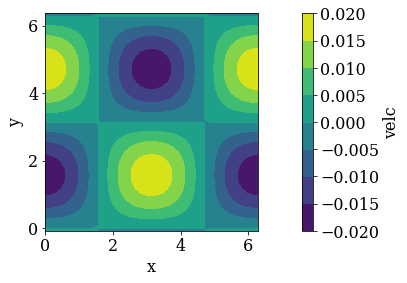

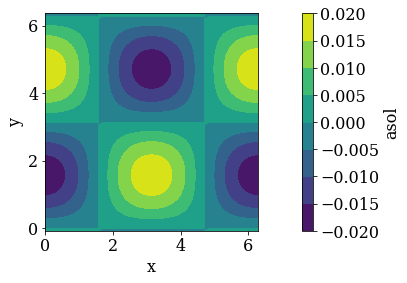

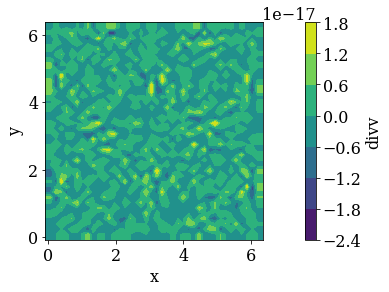

In [7]:
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridx, 'asol')
flowx.io.plot_contour(gridc, 'divv')

In [8]:
gridx.get_error('eror','velc','asol')
gridy.get_error('eror','velc','asol')

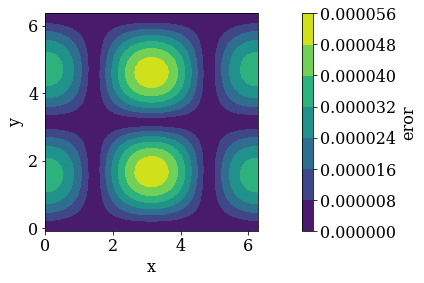

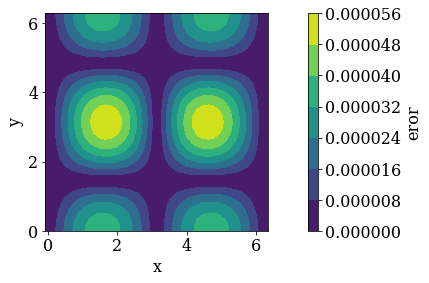

In [9]:
flowx.io.plot_contour(gridx, 'eror')
flowx.io.plot_contour(gridy, 'eror')